Kernel: Linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



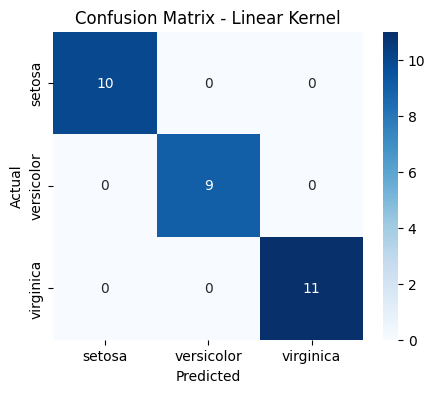

Kernel: Polynomial (degree=3)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



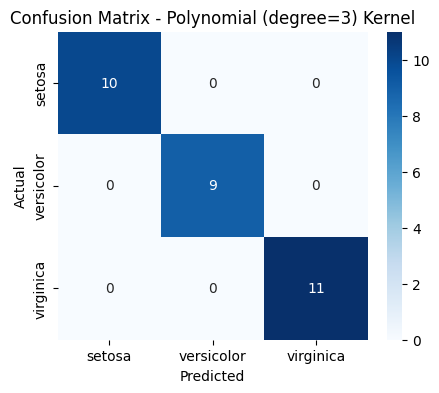

Kernel: RBF
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



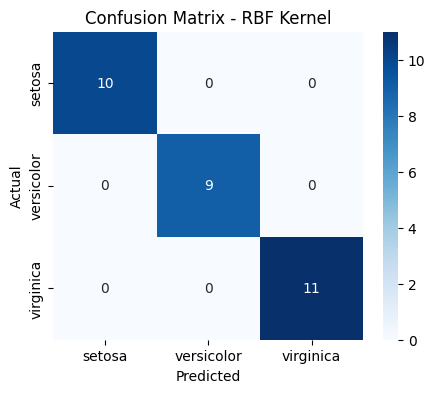



=== Summary of Model Performance ===

Linear:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

Polynomial (degree=3):
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

RBF:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000



In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kernels = {
    "Linear": SVC(kernel="linear"),
    "Polynomial (degree=3)": SVC(kernel="poly", degree=3),
    "RBF": SVC(kernel="rbf")
}

results = {}

for name, model in kernels.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    results[name] = (accuracy, precision, recall, f1)

    print("==============================================")
    print("Kernel:", name)
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)
    plt.title(f"Confusion Matrix - {name} Kernel")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

print("\n\n=== Summary of Model Performance ===\n")
for k, v in results.items():
    print(f"{k}:")
    print(f"Accuracy: {v[0]:.4f}, Precision: {v[1]:.4f}, Recall: {v[2]:.4f}, F1-Score: {v[3]:.4f}\n")


Question 2

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_no_scaling = SVC(kernel='rbf')
model_no_scaling.fit(X_train, y_train)

train_pred_no_scaling = model_no_scaling.predict(X_train)
test_pred_no_scaling = model_no_scaling.predict(X_test)

train_acc_no_scaling = accuracy_score(y_train, train_pred_no_scaling)
test_acc_no_scaling = accuracy_score(y_test, test_pred_no_scaling)

print("===== SVM (RBF) WITHOUT SCALING =====")
print("Training Accuracy:", train_acc_no_scaling)
print("Testing Accuracy :", test_acc_no_scaling)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = SVC(kernel='rbf')
model_scaled.fit(X_train_scaled, y_train)

train_pred_scaled = model_scaled.predict(X_train_scaled)
test_pred_scaled = model_scaled.predict(X_test_scaled)

train_acc_scaled = accuracy_score(y_train, train_pred_scaled)
test_acc_scaled = accuracy_score(y_test, test_pred_scaled)

print("\n===== SVM (RBF) WITH STANDARD SCALING =====")
print("Training Accuracy:", train_acc_scaled)
print("Testing Accuracy :", test_acc_scaled)



print("\nCOMPARISON")
print("Without Scaling: Train:", train_acc_no_scaling, " Test:", test_acc_no_scaling)
print("With Scaling: Train:", train_acc_scaled, " Test:", test_acc_scaled)


===== SVM (RBF) WITHOUT SCALING =====
Training Accuracy: 0.9142857142857143
Testing Accuracy : 0.9473684210526315

===== SVM (RBF) WITH STANDARD SCALING =====
Training Accuracy: 0.989010989010989
Testing Accuracy : 0.9824561403508771

COMPARISON
Without Scaling: Train: 0.9142857142857143  Test: 0.9473684210526315
With Scaling: Train: 0.989010989010989  Test: 0.9824561403508771
